<a href="https://colab.research.google.com/github/PedroAMtz/Multi-Class-Prediction-of-Obesity-Risk/blob/main/Models_Experiments_Obesity_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models Experiments - Baseline + Fine-Tuning + Hyperparameter exploration 🤖🎯

In this Notebook we will focus on models experiments in depth, reaching a baseline model and then fine-tuning for obtaining better performance. The main idea is to implement different classification models from sickit-learn module, explore fine-tuning and understand generally each of the hyperparameter from each model proposed. With this, the objective is to build some relevant theoretical + practical knowledge about ML algorithms and use the Obesity Risk Multi-class prediction dataset to practice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Utility functions 🔧

In [56]:
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV

def evaluation_based_param_grid(grid_parameters: dict,
                                model: sklearn.tree._classes.DecisionTreeClassifier,
                                X_train_and_test_data: list,
                                y_train_and_test_data: list,
                                target_names: list,
                                show_plot: bool=False):

  """
  Perform baseline model training + hyperparameter tuning according
  to a grid of parameters and show comparative results and plots
  """

  base_model = model

  # Begin baseline training
  if X_train_and_test_data[0].shape[0] == y_train_and_test_data[0].shape[0]:
    print("Train data shape consistent, starting training...")
    try:
      base_model.fit(X_train_and_test_data[0], y_train_and_test_data[0])
      predictions = base_model.predict(X_train_and_test_data[1])
      base_model_clf_report = classification_report(y_train_and_test_data[1], predictions, target_names=target_names)
      print("Baseline Training finished succesfully!")
    except Exception as e:
      print(f"Unexpected error ocurred: {e}")

  # Begin hyperparameter tuning training
  if grid_parameters:
    print(f"\n Initializing hyperparameter tuning of model -> {type(model)}")
    try:
      grid_estimator = GridSearchCV(base_model, param_grid=grid_parameters, cv=10, n_jobs=-1)
      grid_estimator.fit(X_train_and_test_data[0], y_train_and_test_data[0])

      grid_best_params = grid_estimator.best_params_
      grid_predictions = grid_estimator.best_estimator_.predict(X_train_and_test_data[1])
      grid_estimator_clf_report = classification_report(y_train_and_test_data[1], grid_predictions, target_names=target_names)

    except Exception as e:
      print(f"Unexpected error ocurred: {e}")

  if grid_estimator_clf_report and base_model_clf_report:
    print(f"################## Baseline Classification Report ##################")
    print("\n", base_model_clf_report, "\n")
    print(f"################# Fine-Tuning Classification Report ################")
    print("\n", grid_estimator_clf_report, "\n")
    print(f"---Best Parameters ----> {grid_best_params}")
  else:
    print(f"Something happened during printing the results...")

  return

## Data Preparation 🧪

In [3]:
data_path = "/content/drive/MyDrive/Data_Science_Foundations/playground-series-s4e2/"

train_data = pd.read_csv(data_path + "train.csv")
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
test_data = pd.read_csv(data_path + "test.csv")
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [6]:
X = train_data[["Weight", "Height", "Age", "CH2O", "FCVC", "FAVC", "CALC", "family_history_with_overweight"]]
y = train_data["NObeyesdad"]

X_test = test_data[["Weight", "Height", "Age", "CH2O", "FCVC", "FAVC", "CALC", "family_history_with_overweight"]]

X = pd.get_dummies(X, columns=["FAVC", "CALC", "family_history_with_overweight"])
X_test = pd.get_dummies(X_test, columns=["FAVC", "CALC", "family_history_with_overweight"])
X_test = X_test.drop(["CALC_Always"], axis=1)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape, y_train.shape)
print("Valid data:", X_valid.shape, y_valid.shape)
print("Test data:", X_test.shape)

Training data: (16606, 12) (16606,)
Valid data: (4152, 12) (4152,)
Test data: (13840, 12)


## Decision Tree Model 🌳

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

**Training & Fine-tuning** 🚴🏻

In [24]:
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=0, ccp_alpha=0.01).fit(X_train, y_train) # fine-tuned

In [36]:
type(tree_model)

sklearn.tree._classes.DecisionTreeClassifier

In [25]:
tree_model.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [17]:
param_dist = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, None]
}

In [18]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(tree_model, param_grid=param_dist, cv=10, n_jobs=-1)

In [19]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.01, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]})

In [21]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6,
                       random_state=0)

In [33]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [23]:
grid.best_score_

0.8425274003902425

In [41]:
grid

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.01, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]})

**Model Intepretability** 🎭

In [11]:
feature_names = X_train.columns
feature_names

Index(['Weight', 'Height', 'Age', 'CH2O', 'FCVC', 'FAVC_no', 'FAVC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes'],
      dtype='object')

In [44]:
feature_importance = pd.DataFrame(grid.best_estimator_.feature_importances_, index=feature_names)
feature_importance

,0
Weight,0.735287
Height,0.103767
Age,0.010390
CH2O,0.000000
FCVC,0.150556
FAVC_no,0.000000
FAVC_yes,0.000000
CALC_Frequently,0.000000
CALC_Sometimes,0.000000
CALC_no,0.000000


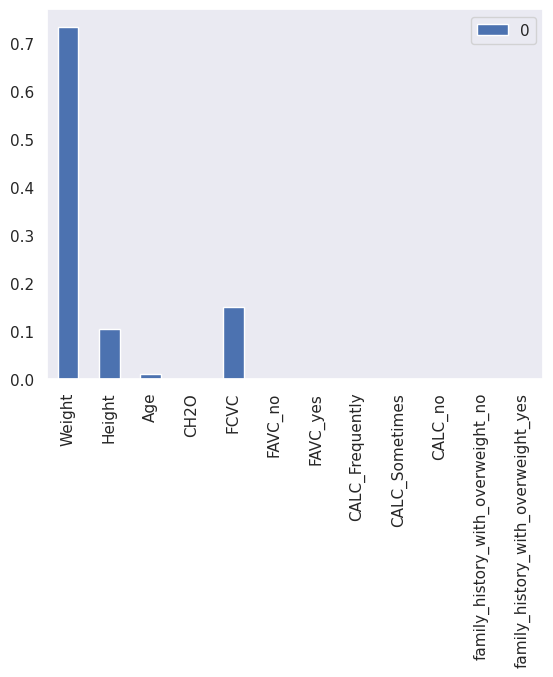

In [45]:
feature_importance.plot(kind="bar");

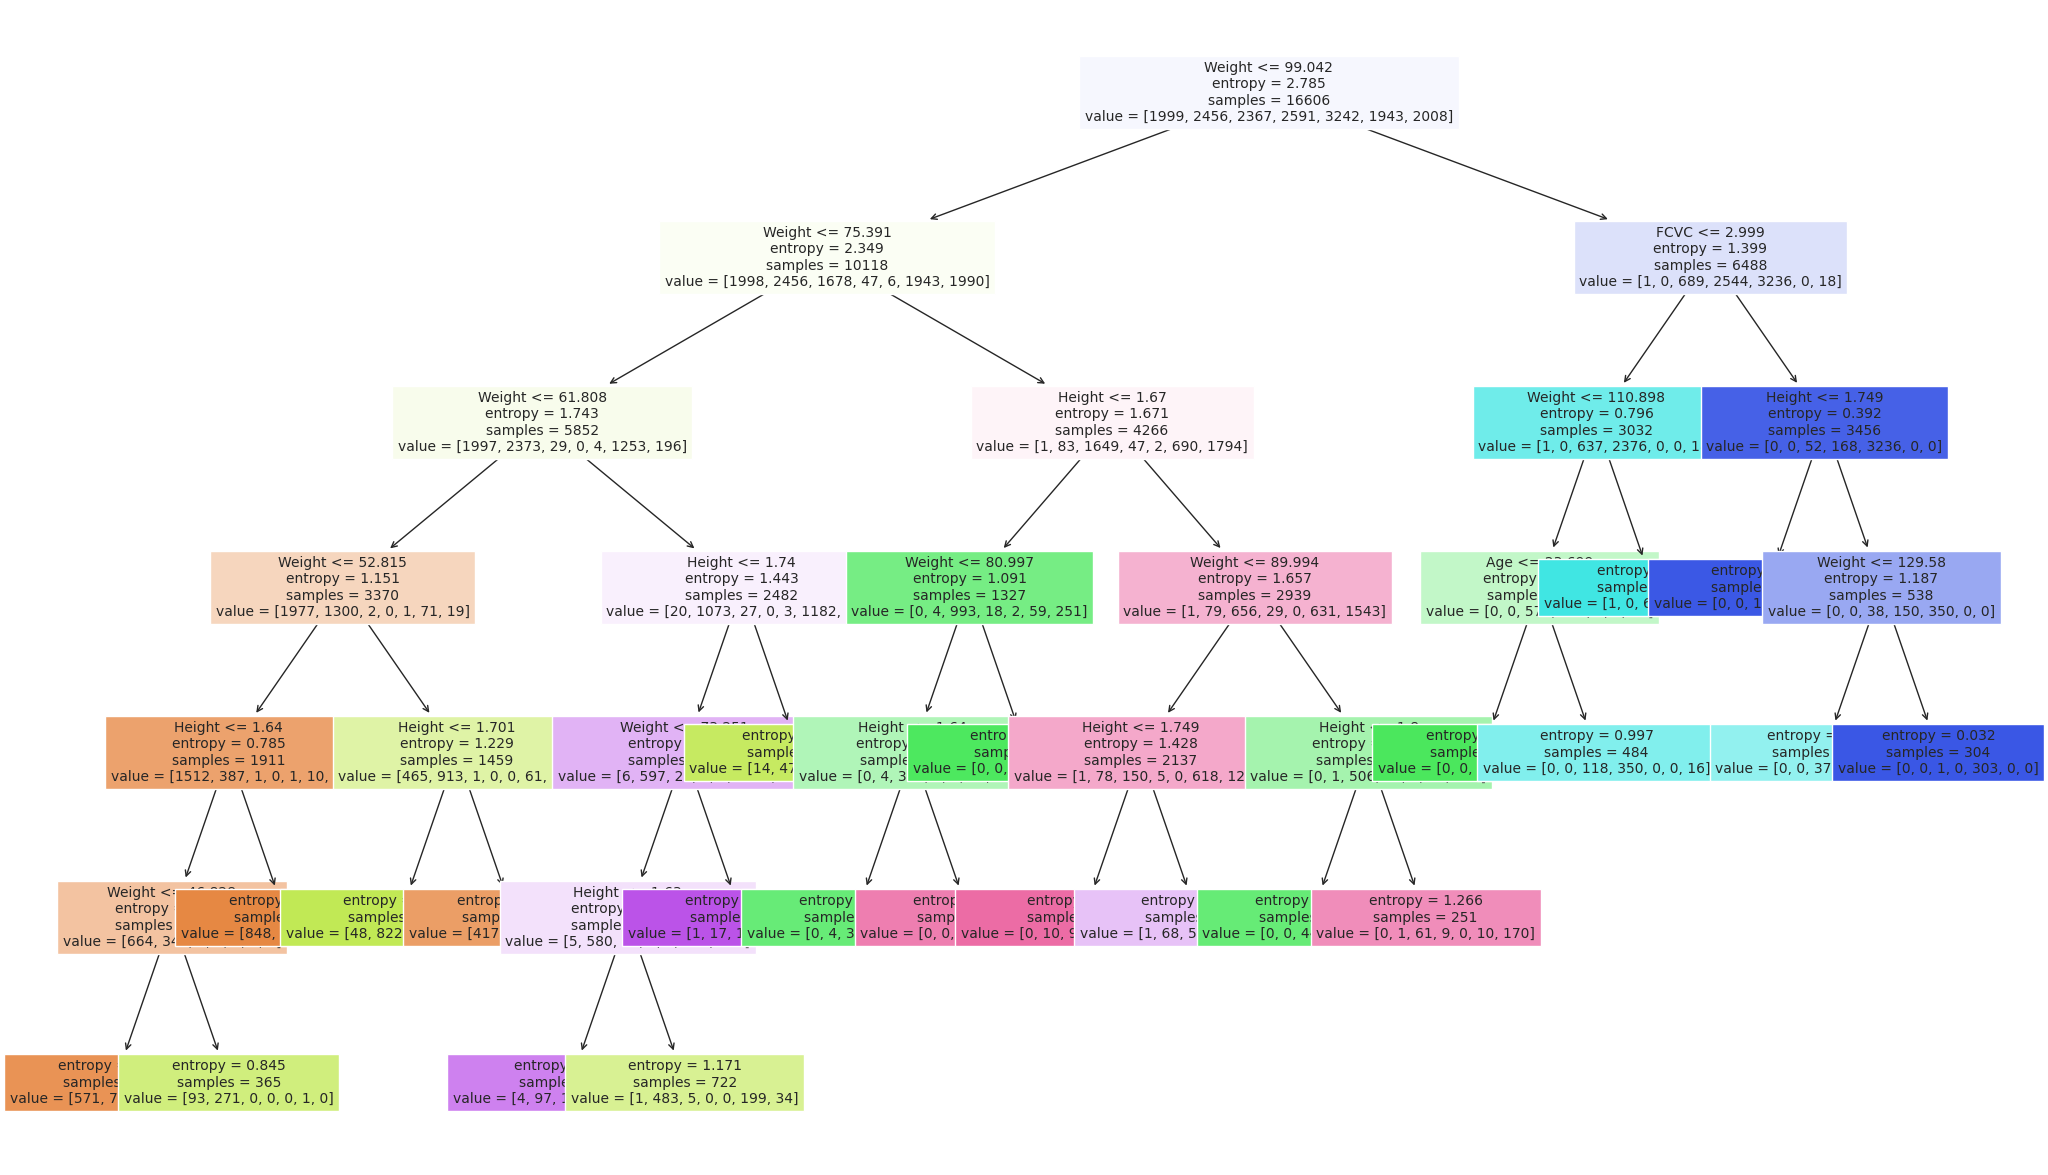

In [29]:
from sklearn import tree

fig = plt.figure(figsize=(25, 15))
_ = tree.plot_tree(tree_model,
                   feature_names=feature_names,
                   filled=True,
                   fontsize=10,
                   label="all")

**Evaluation** ✅

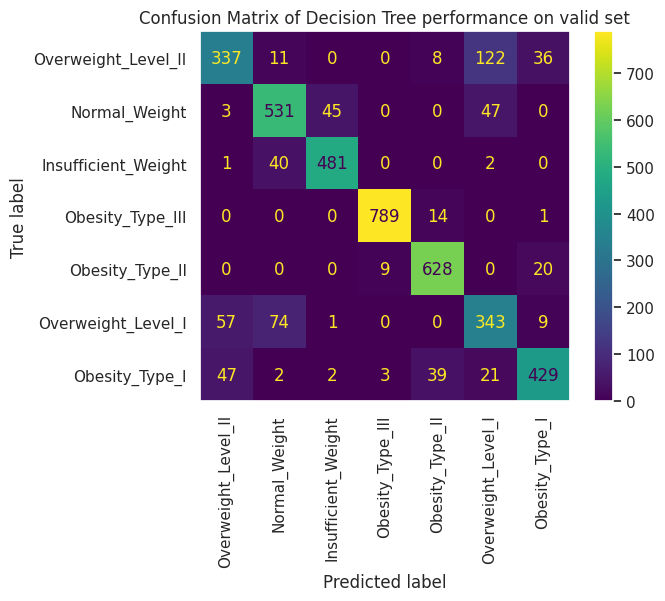

In [30]:
sns.set(style="dark") # drop the grid
predictions = tree_model.predict(X_valid)
cm = confusion_matrix(y_valid, predictions, labels=train_data["NObeyesdad"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data["NObeyesdad"].unique())
disp.plot()
plt.title("Confusion Matrix of Decision Tree performance on valid set")
plt.xticks(rotation=90)
plt.show();

In [31]:
print(classification_report(y_valid, predictions, target_names=train_data["NObeyesdad"].unique()))

                     precision    recall  f1-score   support

Overweight_Level_II       0.91      0.92      0.91       524
      Normal_Weight       0.81      0.85      0.83       626
Insufficient_Weight       0.87      0.79      0.83       543
   Obesity_Type_III       0.91      0.96      0.93       657
    Obesity_Type_II       0.99      0.98      0.98       804
 Overweight_Level_I       0.64      0.71      0.67       484
     Obesity_Type_I       0.76      0.66      0.70       514

           accuracy                           0.85      4152
          macro avg       0.84      0.84      0.84      4152
       weighted avg       0.85      0.85      0.85      4152



**Trying the utility function coded**

In [57]:
tree_model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)

evaluation_based_param_grid(grid_parameters=param_dist, model=tree_model,
                            X_train_and_test_data=[X_train, X_valid],
                            y_train_and_test_data=[y_train, y_valid],
                            target_names=train_data["NObeyesdad"].unique())

Train data shape consistent, starting training...
Baseline Training finished succesfully!

 Initializing hyperparameter tuning of model -> <class 'sklearn.tree._classes.DecisionTreeClassifier'>
################## Baseline Classification Report ##################

                      precision    recall  f1-score   support

Overweight_Level_II       0.90      0.92      0.91       524
      Normal_Weight       0.84      0.65      0.74       626
Insufficient_Weight       0.75      0.74      0.75       543
   Obesity_Type_III       0.93      0.89      0.91       657
    Obesity_Type_II       0.93      1.00      0.96       804
 Overweight_Level_I       0.56      0.81      0.66       484
     Obesity_Type_I       0.73      0.58      0.65       514

           accuracy                           0.81      4152
          macro avg       0.81      0.80      0.80      4152
       weighted avg       0.82      0.81      0.81      4152
 

################# Fine-Tuning Classification Report #######